#Proyecto de clasificación utilizando CNN - MNIST
###Datos del proyecto
Dataset: CIFAR10, a través de Keras

Descripción del dataset: 60000 imágenes en color, de 32x32 px

Objetivo: utilizar redes neuronales convolucionales para lograr clasificar las imágenes

Tipo de problema: clasificación multiclase

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [62]:
X_train.shape

(50000, 32, 32, 3)

In [63]:
X_test.shape

(10000, 32, 32, 3)

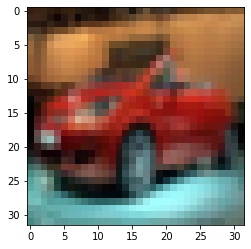

In [7]:
plt.imshow(X_train[45])

In [8]:
X_train.max()

255

Normalización

In [9]:
X_train = X_train / 255

In [10]:
X_test = X_test / 255

Manejo de valores categóricos

In [12]:
from tensorflow.keras.utils import to_categorical

In [28]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [29]:
y_train_encodeado = to_categorical(y_train, num_classes= 10)

In [30]:
y_test_encodeado = to_categorical(y_test, num_classes= 10)

Creación del modelo

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adagrad

In [34]:
X_train[0].shape

(32, 32, 3)

In [41]:
modelo = Sequential()

modelo.add(Conv2D(filters=32, kernel_size=(4,4), input_shape = (32,32,3), activation="relu"))
modelo.add(MaxPool2D(pool_size=(2,2)))

modelo.add(Conv2D(filters=48, kernel_size=(4,4), input_shape = (32,32,3), activation="relu"))
modelo.add(MaxPool2D(pool_size=(2,2)))

modelo.add(Flatten())

modelo.add(Dense(units=256, activation="relu"))

modelo.add(Dense(units=10, activation="softmax"))

modelo.compile(loss="categorical_crossentropy", optimizer="adagrad")

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
early_stop = EarlyStopping(monitor="val_loss", patience=2)

In [44]:
modelo.fit(X_train, y_train_encodeado, epochs=40, validation_data=(X_test, y_test_encodeado), callbacks=[early_stop])

Epoch 1/40
1563/1563 [==============================] - 66s 42ms/step - loss: 1.7666 - val_loss: 1.6484
Epoch 2/40
1563/1563 [==============================] - 65s 42ms/step - loss: 1.6049 - val_loss: 1.5681
Epoch 3/40
1563/1563 [==============================] - 65s 42ms/step - loss: 1.5418 - val_loss: 1.5227
Epoch 4/40
1563/1563 [==============================] - 65s 41ms/step - loss: 1.5023 - val_loss: 1.4915
Epoch 5/40
1563/1563 [==============================] - 65s 42ms/step - loss: 1.4737 - val_loss: 1.4686
Epoch 6/40
1563/1563 [==============================] - 65s 42ms/step - loss: 1.4514 - val_loss: 1.4536
Epoch 7/40
1563/1563 [==============================] - 65s 42ms/step - loss: 1.4332 - val_loss: 1.4349
Epoch 8/40
1563/1563 [==============================] - 66s 42ms/step - loss: 1.4182 - val_loss: 1.4206
Epoch 9/40
1563/1563 [==============================] - 66s 42ms/step - loss: 1.4047 - val_loss: 1.4180
Epoch 10/40
1563/1563 [==============================] - 66s 42m

In [45]:
losses = pd.DataFrame(modelo.history.history)

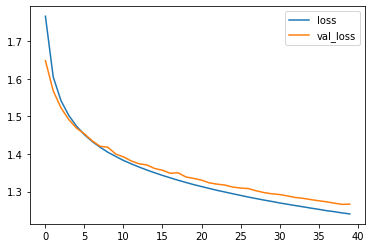

In [46]:
losses.plot()

In [48]:
from sklearn.metrics import confusion_matrix,classification_report

In [55]:
predictions = modelo.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


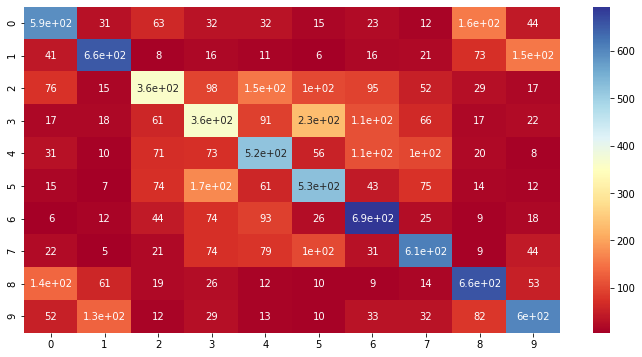

In [60]:
matriz = confusion_matrix(y_test, predictions)

plt.figure(figsize=(12,6))
sns.heatmap(matriz, cmap="RdYlBu", annot=True)

In [61]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.60      0.59      0.59      1000
           1       0.69      0.66      0.67      1000
           2       0.49      0.36      0.42      1000
           3       0.38      0.36      0.37      1000
           4       0.49      0.52      0.50      1000
           5       0.48      0.53      0.50      1000
           6       0.59      0.69      0.64      1000
           7       0.61      0.61      0.61      1000
           8       0.62      0.66      0.64      1000
           9       0.62      0.60      0.61      1000

    accuracy                           0.56     10000
   macro avg       0.56      0.56      0.56     10000
weighted avg       0.56      0.56      0.56     10000

